# Predicting sepal length using sepal width,petal length, petal width

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
#from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
sns.set(style="darkgrid")

In [2]:
iris =load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


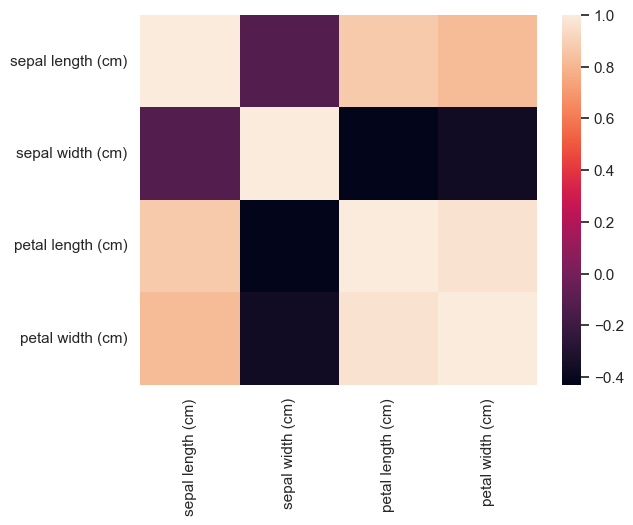

In [3]:
#EDA
# Create correlation matrix
correlation = df.select_dtypes("number").corr()
correlation
# Plot heatmap of `correlation`
sns.heatmap(correlation);

In [4]:
target = "sepal length (cm)"
x = df.drop(columns=target)
#x=x.drop(columns='sepal width (cm)')
y = df[target]

print("X shape:", x.shape)
print("y shape:", y.shape)
x

X shape: (150, 3)
y shape: (150,)


,sepal width (cm),petal length (cm),petal width (cm)
0,3.5,1.4,0.2
1,3.0,1.4,0.2
2,3.2,1.3,0.2
3,3.1,1.5,0.2
4,3.6,1.4,0.2
...,...,...,...
145,3.0,5.2,2.3
146,2.5,5.0,1.9
147,3.0,5.2,2.0
148,3.4,5.4,2.3


In [5]:
x=(x-x.mean())/x.std()
x.head()
y=(y-y.mean())/y.std()
y.head()

0   -0.897674
1   -1.139200
2   -1.380727
3   -1.501490
4   -1.018437
Name: sepal length (cm), dtype: float64

In [6]:
x=np.array(x)
x[:5]

array([[ 1.01560199, -1.33575163, -1.31105215],
       [-0.13153881, -1.33575163, -1.31105215],
       [ 0.32731751, -1.39239929, -1.31105215],
       [ 0.09788935, -1.27910398, -1.31105215],
       [ 1.24503015, -1.33575163, -1.31105215]])

In [7]:
y=np.array(y)
y[:5]

array([-0.89767388, -1.13920048, -1.38072709, -1.50149039, -1.01843718])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.1,random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (135, 3)
y_train shape: (135,)
X_test shape: (15, 3)
y_test shape: (15,)


In [9]:
epochs=1000
lr=0.01

In [10]:
#b represents bias and w means weights
#Batch Gradient Descent function
epochs=1000
lr=0.01
def batch_gradient_descent(x,true_y):
    n=x.shape[1]
    w=np.ones(shape=(n))
    b=1
    total_samples=x.shape[0]
    
    cost_function_values=[]
    epoch_values=[]
    
    for i in range(epochs):
        predicted_y= np.dot(w,X_train.T)+ b
        w_grad=-(2/total_samples)*(x.T.dot(true_y-predicted_y))
        b_grad=-(2/total_samples)*np.sum(true_y-predicted_y)
        
        w = w-lr * w_grad
        b= b-lr * b_grad
        
        cost_function=np.mean(np.square(true_y-predicted_y))
        
        if  i< 1000:
            cost_function_values.append(cost_function)
            epoch_values.append(i)
    return w, b, cost_function,cost_function_values,epoch_values
w,b,cost_function,cost_function_values,epoch_values =batch_gradient_descent(X_train,y_train)
w,b,cost_function

(array([ 0.31345698,  1.03977457, -0.05419617]),
 -0.030457004167269226,
 0.15104245916162296)

Text(0.5, 1.0, 'No of Iterations Against Cost Function')

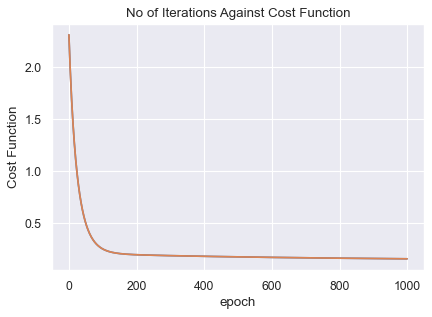

In [11]:
from matplotlib.pyplot import figure
figure(figsize=(6, 4), dpi=80)

plt.plot(epoch_values,cost_function_values)
plt.xlabel("epoch")
plt.ylabel("Cost Function")
plt.title('No of Iterations Against Cost Function')
plt.plot(epoch_values,cost_function_values)
plt.xlabel("epoch")
plt.ylabel("Cost Function")
plt.title('No of Iterations Against Cost Function')

In [12]:
def predict_function(x,w,b):
    predict=w[0]*X_test[0] + w[1]* X_test[1]+ b
    return predict
predict_function(X_test,w,b)


array([ 1.55613734, -1.07536803, -1.25697072])

## Lets try use the sckit Regression Model

In [13]:
#Build our baseline i.e model should beat this
acc_baseline = df['sepal length (cm)'].value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.0667


In [14]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [15]:
# Evaluate our model using MSE-it beats our baseline(0.0667) for both test and train thus so far so good
training_mae = mean_squared_error(y_train, lr.predict(X_train))
test_mae =mean_squared_error(y_test,lr.predict(X_test))
print("Training MSE:", round(training_mae, 2))
print("Test MSE:", round(test_mae, 2))

Training MSE: 0.13
Test MSE: 0.22


In [16]:
#Try predict the first five
X_train_prediction=lr.predict(X_train)
X_train_prediction[:5]

array([ 0.70203782,  0.99108244, -0.27851975,  0.34603004,  0.65305684])